#Libraries and Data

In [30]:
#import libraries
import numpy as np
import pandas as pd
import itertools
from prophet import Prophet
import yfinance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

import pickle

In [2]:
#load the datast
#[OLECTRA,"LT","CONCOR","ELGIEQUIP","IOC","BEL","TATAELXSI","^NSEI"]
#["RELI","HDFCBANK.NS","TATAMOTORS.NS","SBIN.NS","TCS.NS","TITAN.NS","SUNPHARMA.BO","TECHM.NS", "ASIANPAINT.NS","TATACONSUM.NS"]

stock_name = "HDFCBANK.NS"
data = yfinance.download (tickers = "{}".format(stock_name),start="2000-03-06",
                               interval = "1d", group_by = 'ticker', auto_adjust = True)

#data = pd.read_csv("./stock_historical_data/{}.csv".format(stock_name))
#data.set_index("Date", inplace=True)
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-08-03,1640.000000,1651.349976,1623.000000,1628.650024,28836973
2023-08-04,1635.150024,1656.500000,1629.250000,1652.199951,18694152
2023-08-07,1663.099976,1663.099976,1647.550049,1651.250000,14150459
2023-08-08,1651.699951,1655.599976,1642.050049,1649.900024,21886914
2023-08-09,1653.000000,1654.500000,1631.099976,1650.500000,16678491


In [3]:
data["Month"] = data.index.month_name()
data["year"] = data.index.year

<Axes: xlabel='Month', ylabel='Close'>

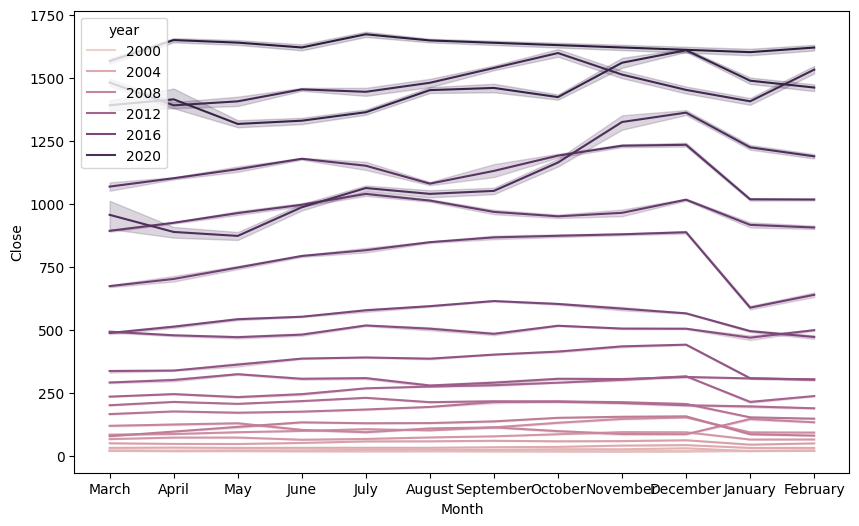

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Close', hue='year', data=data)

#Data preparation

In [5]:
#transform the date variable
data["Date"] = pd.to_datetime(data.index)
#data.Date

In [6]:
#renaming variables
data = data.rename(columns = {'Close': 'y',
                     'Date': 'ds'})
data.tail(10)
data

,Open,High,Low,y,Volume,Month,year,ds
Date,,,,,,,,
2000-03-06,24.516055,24.520211,21.195436,22.113905,2036410,March,2000,2000-03-06
2000-03-07,22.026632,22.267679,21.195438,21.461420,1624120,March,2000,2000-03-07
2000-03-08,22.026628,23.181987,21.777271,22.612619,2004770,March,2000,2000-03-08
2000-03-09,22.454693,23.273420,20.862959,22.408978,1339790,March,2000,2000-03-09
2000-03-10,21.714935,21.860393,20.617760,21.124788,1468330,March,2000,2000-03-10
...,...,...,...,...,...,...,...,...
2023-08-03,1640.000000,1651.349976,1623.000000,1628.650024,28836973,August,2023,2023-08-03
2023-08-04,1635.150024,1656.500000,1629.250000,1652.199951,18694152,August,2023,2023-08-04
2023-08-07,1663.099976,1663.099976,1647.550049,1651.250000,14150459,August,2023,2023-08-07


#Holidays

In [5]:
#Thanksgiving
#thanksgiving_dates = df[df.Thanksgiving == 1].ds
#thanksgiving = pd.DataFrame({'holiday': 'thanksgiving',
 #                      'ds': pd.to_datetime(thanksgiving_dates),
  #                     'lower_window': -5,
   #                    'upper_window': 2})
#thanksgiving.head(2)

In [6]:
#combining holidays
#holidays = pd.concat([easter, thanksgiving])
#holidays

In [7]:
#create training and test set
test_days = 360 * 2
training_set = data.iloc[:-test_days,:]
test_set = data.iloc[-test_days:,:]

In [8]:
training_set.tail(1)
#test_set.tail(1)

,Open,High,Low,y,Volume,Month,year,ds
Date,,,,,,,,
2020-09-15,1039.257345,1047.188031,1029.623756,1041.690063,8252555,September,2020,2020-09-15


#Prophet

In [9]:
m = Prophet(
            #holidays = holidays,
            #seasonality_mode = 'multiplicative',
           # seasonality_prior_scale = 20,
            #changepoint_prior_scale = 0.1,
           # holidays_prior_scale = 10
           )
#m.add_regressor('Christmas')
m.fit(training_set)

16:37:07 - cmdstanpy - INFO - Chain [1] start processing
16:37:09 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
#create future df
#future = m.make_future_dataframe(periods = test_days,
                               #  freq = "B")



In [11]:
#future = pd.concat([future], axis = 1)
#future_full = pd.concat([future_full], axis = 1)

 

In [11]:
#forecast
forecast = m.predict(data)
forecast.tail()
#forecast full data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5848,2023-08-03,1654.899477,1562.841992,1718.755131,1616.510429,1694.486365,-14.993894,-14.993894,-14.993894,-15.222892,-15.222892,-15.222892,0.228998,0.228998,0.228998,0.0,0.0,0.0,1639.905583
5849,2023-08-04,1655.295421,1561.466060,1717.394157,1616.824662,1694.973582,-16.052121,-16.052121,-16.052121,-15.741997,-15.741997,-15.741997,-0.310124,-0.310124,-0.310124,0.0,0.0,0.0,1639.243301
5850,2023-08-07,1656.483253,1557.029030,1717.621894,1617.930784,1696.245204,-17.741785,-17.741785,-17.741785,-15.954715,-15.954715,-15.954715,-1.787071,-1.787071,-1.787071,0.0,0.0,0.0,1638.741468
5851,2023-08-08,1656.879197,1561.927068,1716.832764,1618.245017,1696.767947,-18.634275,-18.634275,-18.634275,-16.406617,-16.406617,-16.406617,-2.227658,-2.227658,-2.227658,0.0,0.0,0.0,1638.244922
5852,2023-08-09,1657.275141,1562.271460,1715.589595,1618.559251,1697.295621,-19.445075,-19.445075,-19.445075,-16.803870,-16.803870,-16.803870,-2.641205,-2.641205,-2.641205,0.0,0.0,0.0,1637.830066


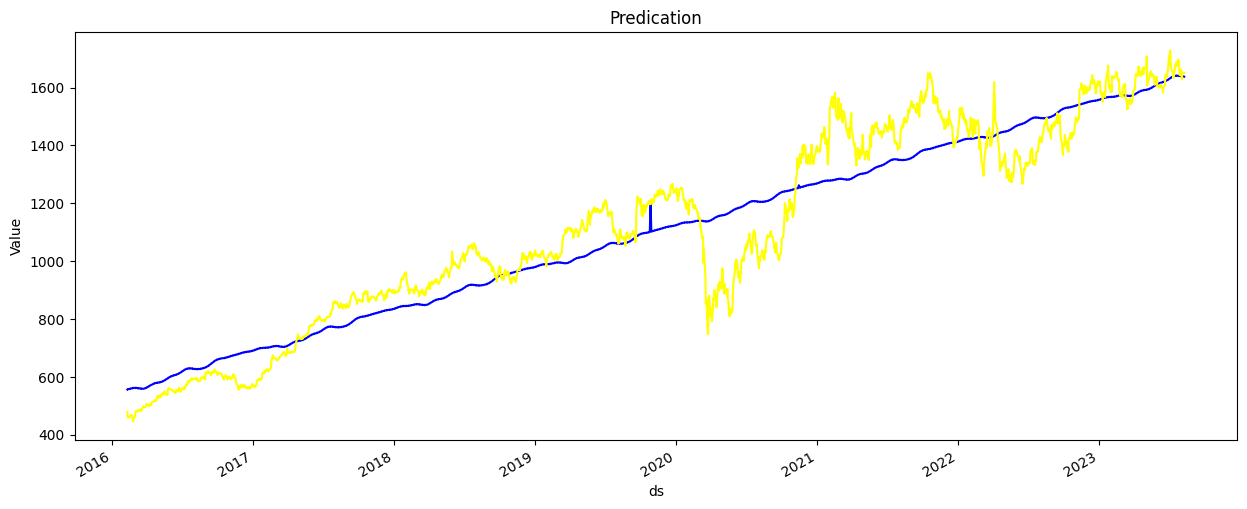

In [12]:
for_df = forecast.copy()
for_df["ds"] = pd.to_datetime(for_df["ds"])
for_df.set_index('ds',inplace=True)

real = data.copy()
real["ds"] = pd.to_datetime(real["ds"])
real.set_index('ds',inplace=True)


plt.title('Predication')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
for_df[4000:].yhat.plot(kind='line', figsize=(15, 6), color=['blue', 'red'])
#for_df[4000:].trend.plot(kind='line', figsize=(15, 6), color=['blue', 'red'])
#for_df[4000:].yhat_upper.plot(kind='line', figsize=(15, 6), color="green")
#for_df[4000:].yhat_lower.plot(kind='line', figsize=(15, 6), color="red")
real[4000:].y.plot(kind='line', figsize=(15, 6), color="yellow")

plt.show()

In [13]:
data = data.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
data

,Date,Open,High,Low,y,Volume,Month,year,ds
0,2000-03-06,24.516055,24.520211,21.195436,22.113905,2036410,March,2000,2000-03-06
1,2000-03-07,22.026632,22.267679,21.195438,21.461420,1624120,March,2000,2000-03-07
2,2000-03-08,22.026628,23.181987,21.777271,22.612619,2004770,March,2000,2000-03-08
3,2000-03-09,22.454693,23.273420,20.862959,22.408978,1339790,March,2000,2000-03-09
4,2000-03-10,21.714935,21.860393,20.617760,21.124788,1468330,March,2000,2000-03-10
...,...,...,...,...,...,...,...,...,...
5848,2023-08-03,1640.000000,1651.349976,1623.000000,1628.650024,28836973,August,2023,2023-08-03
5849,2023-08-04,1635.150024,1656.500000,1629.250000,1652.199951,18694152,August,2023,2023-08-04
5850,2023-08-07,1663.099976,1663.099976,1647.550049,1651.250000,14150459,August,2023,2023-08-07
5851,2023-08-08,1651.699951,1655.599976,1642.050049,1649.900024,21886914,August,2023,2023-08-08


In [14]:
#get some variables
prophet_variables = forecast.loc[:, ["trend","weekly" ,"yearly","yhat"]]
df_xgb = pd.concat([data, prophet_variables], axis = 1)
df_xgb.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,5853,2011-10-13 03:09:11.717068032,2000-03-06 00:00:00,2005-10-24 00:00:00,2011-09-26 00:00:00,2017-09-08 00:00:00,2023-08-09 00:00:00,NaN
Open,5853.0,457.248711,16.149317,60.129483,218.352501,846.145736,1723.449951,501.554914
High,5853.0,461.709667,16.392833,61.185922,220.990524,856.452836,1757.5,505.837362
Low,5853.0,452.413422,15.499754,59.103841,215.767563,838.954658,1713.800049,496.957601
y,5853.0,457.166667,16.063866,60.261532,217.948563,847.392029,1728.199951,501.415665
Volume,5853.0,5909838.965829,0.0,2229560.0,4377570.0,7439420.0,201129980.0,6149976.142919
year,5853.0,2011.283786,2000.0,2005.0,2011.0,2017.0,2023.0,6.813822
ds,5853,2011-10-13 03:09:11.717068032,2000-03-06 00:00:00,2005-10-24 00:00:00,2011-09-26 00:00:00,2017-09-08 00:00:00,2023-08-09 00:00:00,NaN
trend,5853.0,468.52949,34.998694,76.774341,242.868551,801.640157,1657.275141,489.29412
weekly,5853.0,-16.008528,-16.80387,-16.406617,-15.954715,-15.741997,87.452028,1.462517


#XGBoost preparation

In [15]:
#create training and test set
test_days = 360
training_set = df_xgb.iloc[:-test_days,:]
test_set = df_xgb.iloc[-test_days:,:]

In [16]:
#isolate X and y
y_train = training_set.y
y_test = test_set.y 
X_train = training_set[["trend","yearly","weekly","yhat"]]
X_test = test_set[["trend","yearly","weekly","yhat"]]


In [17]:
#Matrices
import xgboost as xgb
Train = xgb.DMatrix(X_train, label = y_train)
Test = xgb.DMatrix(X_test, label = y_test)

In [27]:
#set the parameters
parameters = {
          'learning_rate': 0.09,
              'max_depth': 3,
              'colsample_bytree': .7,
              'subsample': .8,
              'min_child_weight' : 3,
              'gamma': 0,
              'random_state': 1502,
              'eval_metric': "rmse",
              'objective': "reg:squarederror"
             }

#XGBoost

In [52]:
model = xgb.train(params = parameters,
                  dtrain = Train,
                  num_boost_round = 1,
                  evals = [(Test, "y")])



[0]	y-rmse:1386.62977


In [37]:
# Provide Gris for Hyperparams
param_grid = {
    "gamma": [0, 0.1, 0.2, 0.5, 1, 1.5, 2, 3, 6, 12, 20],
    "learning_rate": [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8],
    "max_depth": [1, 2, 3, 4, 5, 6, 8, 12],
    "n_estimators": [25, 50, 65, 80, 100, 115, 200]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, scoring="accuracy")
#print(grid_search)

best_model = grid_search.fit(Train,Test)
hyperparams = best_model.best_params_
ne = hyperparams["n_estimators"]
lr = hyperparams["learning_rate"]
md = hyperparams["max_depth"]
gm = hyperparams["gamma"]
print("Recommended Params >>", f"ne: {ne},", f"lr: {lr}", f"md: {md}", f"gm: {gm}")

TypeError: Singleton array array(<xgboost.core.DMatrix object at 0x7ffe192947c0>, dtype=object) cannot be considered a valid collection.

In [21]:
#forecasting
predictions = pd.Series(model.predict(Test), name = "XGBoost")
predictions.index  = test_set.ds

In [22]:
training_set["Data"] = pd.to_datetime(training_set["Date"])
training_set.set_index("Date",inplace=True)
training_set
test_set["Data"] = pd.to_datetime(test_set["Date"])
test_set.set_index("Date",inplace=True)
test_set



/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_4727/3365430804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set["Data"] = pd.to_datetime(training_set["Date"])
/var/folders/4_/_fbkdkz531s_92lxx_c_x6n00000gn/T/ipykernel_4727/3365430804.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Data"] = pd.to_datetime(test_set["Date"])


,Open,High,Low,y,Volume,ds,trend,weekly,yearly,yhat,Data
Date,,,,,,,,,,,
2022-02-24,685.866834,701.124661,661.385595,664.967041,3091298,2022-02-24,444.834915,5.320098,-2.472908,447.682104,2022-02-24
2022-02-25,677.035991,699.947257,672.718636,696.169617,1771881,2022-02-25,445.001795,5.055317,-2.579990,447.477122,2022-02-25
2022-02-28,686.357515,707.257310,681.500506,705.098633,1935344,2022-02-28,445.502436,5.223895,-2.931161,447.795170,2022-02-28
2022-03-02,698.573581,705.098602,688.368957,697.641418,1938441,2022-03-02,445.836197,5.174070,-3.206726,447.803541,2022-03-02
2022-03-03,698.769802,705.245774,671.688329,674.141357,2112330,2022-03-03,446.003077,5.320098,-3.361332,447.961844,2022-03-03
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,855.000000,855.000000,838.200012,843.049988,1604731,2023-08-02,532.280250,5.174070,2.221104,539.675424,2023-08-02
2023-08-03,840.000000,841.650024,832.549988,835.400024,1375222,2023-08-03,532.447130,5.320098,2.531538,540.298766,2023-08-03
2023-08-04,837.049988,841.599976,832.299988,834.799988,887582,2023-08-04,532.614011,5.055317,2.862369,540.531697,2023-08-04


In [23]:
predictions.describe()

count    360.000000
mean     692.004456
std        6.950974
min      674.874329
25%      687.771500
50%      691.141693
75%      693.513550
max      715.124573
Name: XGBoost, dtype: float64

#VIZ and assessment

<Axes: xlabel='ds'>

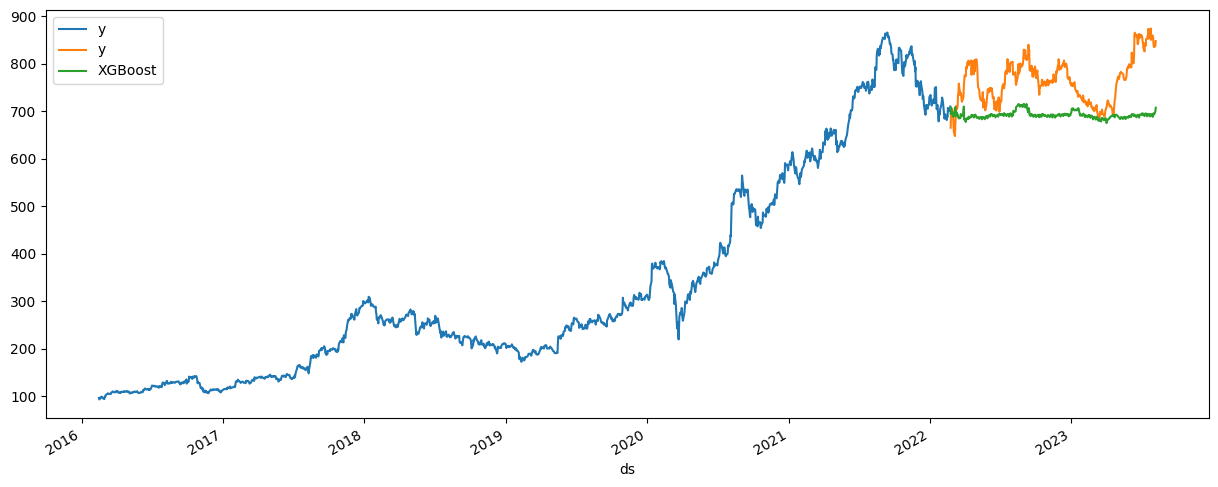

In [24]:
training_set[4000:].y.plot(figsize = (15,6), legend = True)
test_set.y.plot(figsize = (15,6), legend = True)

#test_set.y.plot(legend = True)
predictions.plot(legend = True)

In [34]:
result_test = []
result_pred = []
from sklearn.metrics import accuracy_score

days_next = 21
for x in range(len(test_set.y)-days_next):
    if x % days_next == 0:
        #print(x)

        if test_set.y.iloc[x+days_next] > test_set.y.iloc[x]:
            result_test.append(1)
        else:
            result_test.append(0)
        
        if predictions.iloc[x+days_next] > predictions.iloc[x]:
            result_pred.append(1)
        else:
            result_pred.append(0)
        
d = accuracy_score(result_pred,result_test)
print(d)

0.7058823529411765


In [26]:
#MAPE
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set.y, predictions)

9.342160627112401

<Figure size 1000x500 with 0 Axes>

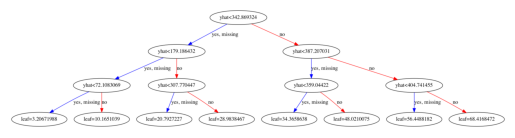

In [27]:
dir(model)
plt.figure(figsize=(10, 5))
xgb.plot_tree(model, num_trees=0, rankdir='TB')  # Change rankdir to 'TB' for top-to-bottom view
plt.show()

#Future

